# Домашнее задание 1. Сбор данных

При решении реальных задач мы почти никогда не имеем дело с "хорошими" исходными данными, уже подготовленными для обработки и анализа. Как правило на входе имеются неструкткрированные данные в "грязном" виде, например необработанные тексты, изображения или аудио файлы. Иногда нет даже этого, и данные приходится собирать из разных доступных источников: разнообразных баз данных, внешних сервисов и даже электронных таблиц. После того, как данные получены, их унифицируют, очищают от шума, преобразовывают в нужный вид и сохраняют для дальнейшего анализа. В одном из традиционных подходов к Data Mining этот процесс называется Extract-Transform-Load

In [2]:
!pip install -r requirements.txt

    100% |████████████████████████████████| 14.1MB 47kB/s eta 0:00:011
  Running setup.py bdist_wheel for sklearn ... - \ done
  Stored in directory: /Users/sereja589/Library/Caches/pip/wheels/d7/db/a3/1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
  Running setup.py bdist_wheel for gensim ... - \ | / - \ | / done
  Stored in directory: /Users/sereja589/Library/Caches/pip/wheels/b1/9d/56/a9dd48a73d54b76c3651864fef5ba66bad19b56e4fce326ca4
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /Users/sereja589/Library/Caches/pip/wheels/2d/74/1e/11ec2ef3c9f612f138eec180f03181137bea8d15d663fe69c2
  Running setup.py bdist_wheel for bz2file ... - \ done
  Stored in directory: /Users/sereja589/Library/Caches/pip/wheels/31/9c/20/996d65ca104cbca940b1b053299b68459391c01c774d073126
Successfully built sklearn gensim smart-open bz2file


In [3]:
import vk
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from folium.plugins import MarkerCluster
%matplotlib inline

Нам потребуется загрузить информацию о местах, в которых совершаются чекины, иначе говоря провести сбор данных (data collection). [Ссылка на ВК для разработчиков](https://vk.com/dev)

Для того, чтобы получить доступ к API прежде всего необходимо зарегистрироваться в VK в качестве разработчика и создать свое [приложение](https://vk.com/apps?act=manage). После создания приложения будет доступен набор ключей, которые мы будем использовать для аутентификации. Далее вам потребуется создать токен авторизации, чтобы получать доступ к API. Этот токен необходимо скопировать в соответствующие константы ниже. Подробнее о том, как работает аутентификация в VK API можно почитать [по ссылке](https://vk.com/dev/first_guide), хотя это нужно скорее для ознакомления: библиотека обращения с API позаботится о механизме аутентификации за нас.

In [4]:
ACCESS_TOKEN = "7a2dce8281532e239f1f1341b591593bdf451834ffa3e9893431a19936a10053186ffb264d8b4c16ecf7c"
session = vk.Session(access_token=ACCESS_TOKEN)
vkapi = vk.API(session=session)

VK API может отдавать вам посещаемые места несколькими способами: в некотором радиусе от точки или же по id самого места. Мы будем пользоваться [вторым способом](https://vk.com/dev/places.getById) . Требуется написать функцию, которая на вход получает объект подключения к API и индекс, до какого объекта требуется запросить. Возвращать она будет pandas.DataFrame с полученными данными.

In [5]:
def get_place_info(vkapi, idx=5000):
    list_of_places = []
    for i in range(1, idx + 1, 1000):
        upper_bound = min(i + 1000, idx + 1)
        cur_id_lst = [j for j in range(i, upper_bound)]
        places = vkapi.places.getById(places=cur_id_lst)
        list_of_places += places
    return pd.DataFrame(list_of_places)

Предположим, что мы хотим понять несколько фактов о выборке объектов с id от 1 до 5000.
Помогите нам это сделать.
А вот и сами факты:
1. Провизуализируйте на карте все объекты которые находятся в Москве? Где больше объектов, в центре или на окраине?
2. Посчитайте количество объектов разного типа. Постройте распределение? Объектов какого типа больше в данной выборке?
3. Посчитайте распределение числа чекинов по всей выборке. Визуализируйте его.
4. Постройте box plot по числу чекинов для каждого типа объектов.
5. Преобразуйте поле created в datetime. Как давно были созданы объекты? Сколько объектов существует больше года? 

Не забудьте сохранить данную выборку, в будущем она вам понадобится.

In [6]:
#places = get_place_info(vkapi) #загружаем данные

In [7]:
#places.to_csv('places.csv', encoding='utf-8') #и сохраняем в places.csv

In [8]:
places = pd.read_csv('places.csv', index_col=0)

In [9]:
places.head()

,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,Мячковский б-р 3а,435,1,1,1280741941,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.487519e+09
1,Дачная 2а,14,123,1,1280741941,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.483478e+09
2,Лени Голикова 29,8,2,1,1280741941,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,Героев Танкограда 63,8,158,1,1280741941,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,Мусы Джалиля 14К1,38,99,1,1280741941,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.488720e+09


In [10]:
mos_center = [55.750475, 37.619020]

In [11]:
moscow_places = places[places.city == 1]

In [12]:
moscow = folium.Map(location=mos_center, zoom_start=11, control_scale=True)

In [13]:
moscow

In [14]:
coordinates_moscow_places = moscow_places[['latitude', 'longitude']]

In [15]:
marker_cluster = MarkerCluster(locations=coordinates_moscow_places.values)

In [16]:
marker_cluster.add_to(moscow)

In [17]:
moscow

На карте видно, что больше объектов расположено в центре

In [18]:
places.type.value_counts()

3    3704
4    1296
Name: type, dtype: int64

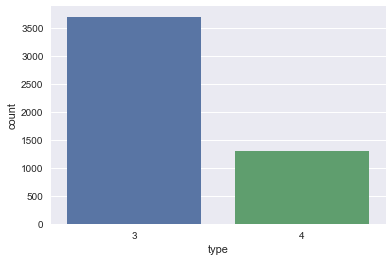

In [19]:
sns.countplot(places.type)

3 - рестораны, 4 - клубы

Ресторанов - 3704,
Клубов - 1296

В выборке больше ресторанов

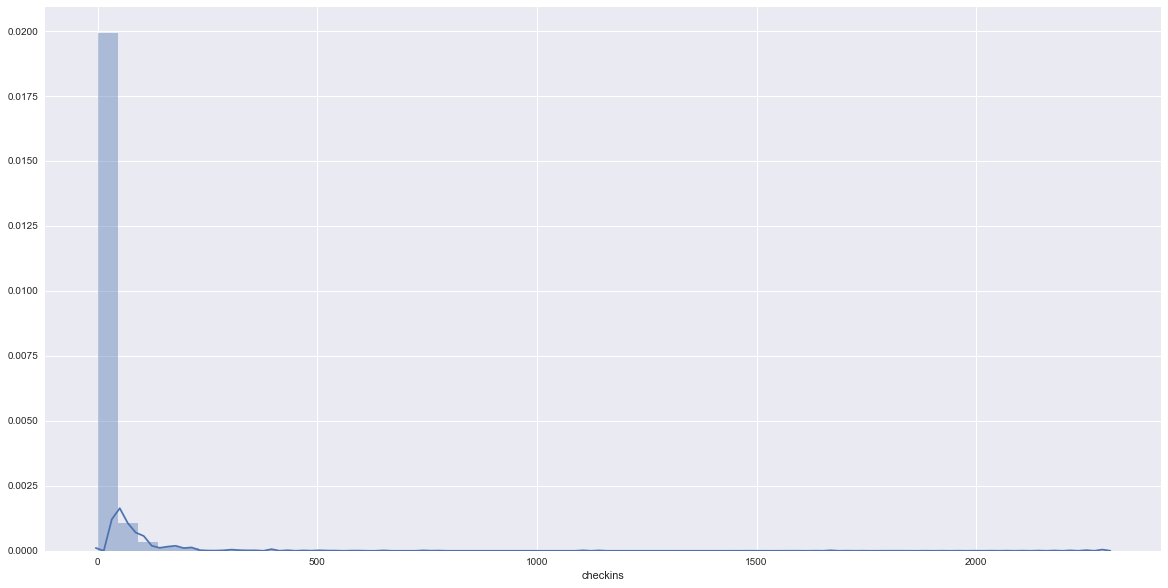

In [20]:
plt.subplots(figsize = (20, 10))
sns.distplot(places.checkins)

Распределение числа чекинов по всей выборке

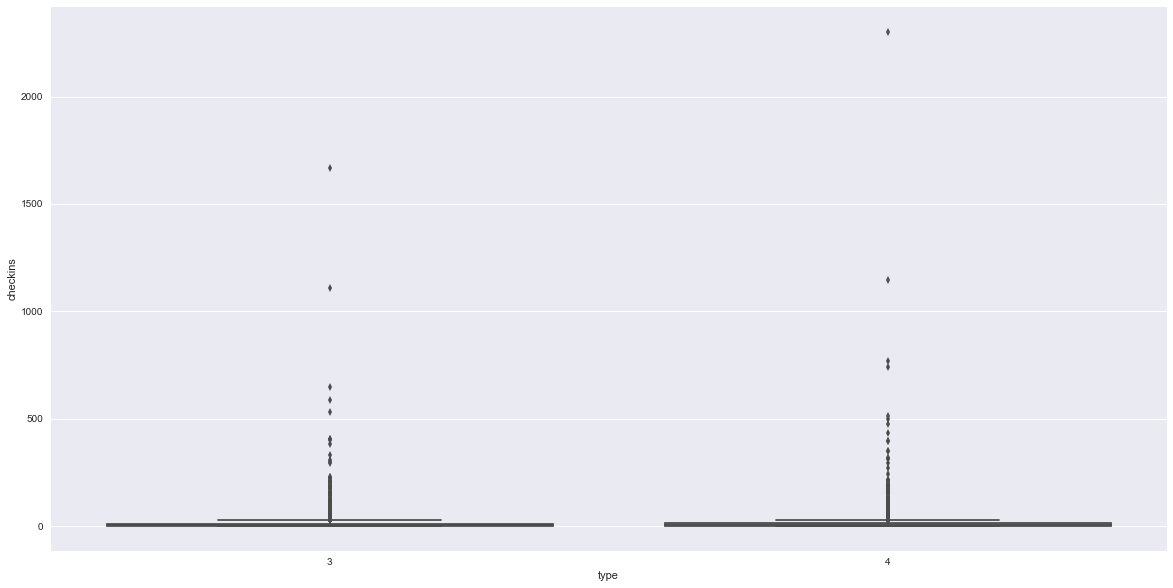

In [21]:
plt.subplots(figsize = (20, 10))
sns.boxplot(x=places.type, y=places.checkins)

boxplot по числу чекинов всех типов

In [22]:
created = places.created.copy()
created = created.apply(lambda x: datetime.datetime.fromtimestamp(x))
created.head()

0   2010-08-02 13:39:01
1   2010-08-02 13:39:01
2   2010-08-02 13:39:01
3   2010-08-02 13:39:01
4   2010-08-02 13:39:01
Name: created, dtype: datetime64[ns]

In [23]:
created.min()

Timestamp('2010-08-02 13:39:01')

In [24]:
created.max()

Timestamp('2010-08-02 13:41:18')

Все объекты были созданы в один день с 13:39:01 до 13:41:18, очевидно все они существуют больше года